 # SM run example: PROMISE12

In [1]:
import os, sys, logging
logging.getLogger('matplotlib').setLevel(logging.ERROR)
logging.getLogger("PIL.PngImagePlugin").setLevel(logging.ERROR) # PIL logs too much.
logging.getLogger("matplotlib.font_manager").setLevel(logging.ERROR) # matplotlib logs too much.

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from medpy import metric as medmetric

log = logging.getLogger()
formatter = logging.Formatter('[%(levelname)-8s] %(message)s')
ch = logging.StreamHandler()
ch.setFormatter(formatter)
log.addHandler(ch)
log.setLevel(logging.INFO)

%matplotlib inline

In [2]:
import simplemind
from simplemind import sm, sm_model_summary

# will be changed to be open-souce image reader soon
import simplemind.engine.bin.sm.script.__qia__
import qia.common.img.image as qimage

log.info('---------------------------------------------------------------')
log.info('Environments')
log.info('---------------------------------------------------------------')
log.info('python %d.%d.%d' % sys.version_info[:3])
log.info('simplemind v.%s' % simplemind.__version__)
log.info('---------------------------------------------------------------')

[INFO    ] ---------------------------------------------------------------
[INFO    ] Environments
[INFO    ] ---------------------------------------------------------------
[INFO    ] python 3.7.2
[INFO    ] simplemind v.0+untagged.68.gef1dd86.dirty
[INFO    ] ---------------------------------------------------------------


## SM for PROMISE12
###  SM Model

In [3]:
model_path = 'sm_model_promise12/prostate_model'

#### Model Summary

In [4]:
sm_model = sm_model_summary.SMBaseModel(model_path, log)

[INFO    ] ---------------------------------------------------------------
[INFO    ] SM model for segmentation
[INFO    ] ---------------------------------------------------------------
[INFO    ] Model path: 
sm_model_promise12/prostate_model
[INFO    ] Node list exposed from the model: 
['input', 'prostate_whole_cnn', 'prostate_whole', 'prostate_center_slice', 'prostate_apex_box', 'prostate_base_box', 'prostate_center_box', 'prostate_apex_focused_cnn', 'prostate_apex_focused', 'prostate_base_focused_cnn', 'prostate_base_focused', 'prostate_center', 'prostate_apex_attention', 'prostate_base_attention', 'prostate_combine_cnn', 'prostate_final', 'output']
[INFO    ] ---------------------------------------------------------------
[INFO    ] Read relationship
[INFO    ] ---------------------------------------------------------------
[INFO    ] Node: prostate_whole_cnn
[INFO    ] 	parents: ['input']
[INFO    ] Node: prostate_whole
[INFO    ] 	parents: ['prostate_whole_cnn']
[INFO    ] Nod

[INFO    ] Generating graph summary of the SM model
[INFO    ] ---------------------------------------------------------------


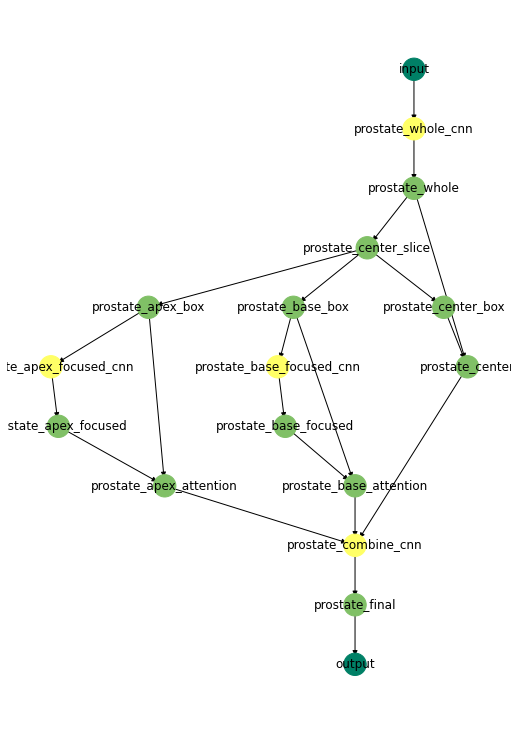

In [5]:
G, fig = sm_model.get_summary_graph(figsize=(7,10), font_size=12)

### SM runner [RUN mode]
#### Executing the SM model

In [6]:
current_dir_list = os.listdir('.')
log.info(f'Current directory file/sub_directory list:\n\t{current_dir_list}')
case_id = "Case20"
image_path = f"data/{case_id}.mhd"
model_path = f"sm_model_promise12/prostate_model"
working_dir = f"working_dir"
output_dir = f"output_{case_id}"

assert os.path.exists(image_path), 'Make sure that you have the image file in the right place.'
assert os.path.exists(model_path), 'Make sure that you have the model file in the right place.'

[INFO    ] Current directory file/sub_directory list:
	['visualize_roi.ipynb', '.ipynb_checkpoints', 'working_dir', 'data', 'SM_run_promise12.ipynb', 'output_Case20', 'run.sh', 'sm_model_promise12']


In [7]:
sm.runner(image_path = image_path, sm_model = model_path, output_dir = output_dir, working_directory=working_dir)

Writing model config section: model_info
Writing model config section: path_info
Writing model config section: search_area_attention_info
Writing model config section: chromosome_info
Writing model config section: training_info
Writing model config section: callbacks_info
Writing model config section: validation_info
Writing model config section: test_info
Writing model config section: tensorboard_info
Writing model config section: png_info


SM runner executable path:  /opt/conda/envs/py/lib/python3.7/site-packages/simplemind-0+untagged.68.gef1dd86.dirty-py3.7-linux-x86_64.egg/simplemind/engine/bin/sm/sm
miu_nod main
Deleting output_Case20
Recreating output_Case20
Prediction only with a single-core CPU
Skipping generate png normalized input for training
ROI directory not specified
EDM directory = working_dir
Chromosome not specified
Stop at Node not specified
User Resource Directory not specified
MIU will be run by locally
Done reading 20 slices
checking slice locations.....
Done checking slice locations.
Test: sm_model_promise12/prostate_model
Model name: prostate_model
Model path: sm_model_promise12
Model chromosome = 
Reading model from sm_model_promise12/prostate_model
Reading entity prostate_final
Reading entity prostate_combine_cnn
Reading entity prostate_base_attention
Reading entity prostate_apex_attention
Reading entity prostate_center
Reading entity prostate_base_focused
Reading entity prostate_base_focused_cnn
R

Using TensorFlow backend.
[2022-06-07 21:09:06,916|root      |INFO    |cnn_predict.py           :365] ---------------------------------------------------------------
[2022-06-07 21:09:06,916|root      |INFO    |cnn_predict.py           :366] Python Environments
[2022-06-07 21:09:06,916|root      |INFO    |cnn_predict.py           :367] ---------------------------------------------------------------
[2022-06-07 21:09:06,916|root      |INFO    |cnn_predict.py           :368] python v. 3.7.2
[2022-06-07 21:09:06,916|root      |INFO    |cnn_predict.py           :369] numpy v. 1.16.3
[2022-06-07 21:09:06,916|root      |INFO    |cnn_predict.py           :370] tensorflow v. 1.15.0
[2022-06-07 21:09:06,916|root      |INFO    |cnn_predict.py           :371] keras v. 2.3.1
[2022-06-07 21:09:06,916|root      |INFO    |cnn_predict.py           :374] ---------------------------------------------------------------
[2022-06-07 21:09:06,916|root      |INFO    |cnn_predict.py           :375] Model Conf

----------------------------------------------------
Custom model:
----------------------------------------------------
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, None, None, N 0                                            
__________________________________________________________________________________________________
e0_conv (Conv3D)                (None, None, None, N 436         input[0][0]                      
__________________________________________________________________________________________________
e0_in (InstanceNormalization)   (None, None, None, N 8           e0_conv[0][0]                    
__________________________________________________________________________________________________
e0_activation (Activation)      (None, None, None, N 0           e0_in[

[2022-06-07 21:09:07,664|root      |INFO    |cnn_network.py           :432] The custom architecture unet_3d_prostate_custom_small from custom module working_dir/prostate_whole_cnn_KerasModel/custom_architecture.py is loaded.
[2022-06-07 21:09:08,145|root      |INFO    |cnn_network.py           :468] Calculation using CPU cores
[2022-06-07 21:09:08,295|root      |DEBUG   |cnn_reader_base.py       :2024] The image shape after cropping with search area: (20, 320, 320).
[2022-06-07 21:09:08,295|root      |DEBUG   |cnn_reader_base.py       :1762] Done loading images, rois, bounding boxe and ph_area information.
[2022-06-07 21:09:08,672|root      |DEBUG   |cnn_reader_base.py       :1793] len(intensity_norm) : 4
[2022-06-07 21:09:24,342|root      |DEBUG   |cnn_reader_base.py       :1089] PNG saved at output_Case20/prostate_whole_cnn_none_minmax_input_image.png
[2022-06-07 21:09:38,403|root      |DEBUG   |cnn_reader_base.py       :1089] PNG saved at output_Case20/prostate_whole_cnn_none_centil

python /opt/conda/envs/py/lib/python3.7/site-packages/simplemind-0+untagged.68.gef1dd86.dirty-py3.7-linux-x86_64.egg/simplemind/engine/bin/sm/script/cnn_predict.py --model_config output_Case20/prostate_whole_cnn_config.ini --resource_config /prostate_whole_cnn_resource.ini --verbose 2
cnn_predict.py completed with return value = 0
pred path: output_Case20/pred.roi
pred found
done
Done
Activating ImCandConf....
Done
Activating NextSolel....
Done
Activating FormGroupCands....
Done
Activating GroupCandConf....
Done
Activating MatchCands....
Done
Activating FreeCandidates....
Freeing candidates of prostate_whole_cnn
Done
Activating NextSolel....
Done
Activating NextGroup....
Done
Activating FormCandsFromSearchArea....


Segmenting prostate_whole with FormCandsFromSearchArea
Using MorphClose prostate_whole_cnn.... done
Minimum number of voxels required to form a candidate is 1000
Done
Activating ImCandConf....
Done
Activating NextSolel....
Done
Activating FormGroupCands....
Done
Activating 

Writing model config section: model_info
Writing model config section: path_info
Writing model config section: search_area_attention_info
Writing model config section: chromosome_info
Writing model config section: training_info
Writing model config section: callbacks_info
Writing model config section: validation_info
Writing model config section: test_info
Writing model config section: tensorboard_info
Writing model config section: png_info
Using TensorFlow backend.
[2022-06-07 21:10:13,426|root      |INFO    |cnn_predict.py           :365] ---------------------------------------------------------------
[2022-06-07 21:10:13,426|root      |INFO    |cnn_predict.py           :366] Python Environments
[2022-06-07 21:10:13,426|root      |INFO    |cnn_predict.py           :367] ---------------------------------------------------------------
[2022-06-07 21:10:13,426|root      |INFO    |cnn_predict.py           :368] python v. 3.7.2
[2022-06-07 21:10:13,426|root      |INFO    |cnn_predict.py  

----------------------------------------------------
Custom model:
----------------------------------------------------
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, None, None, N 0                                            
__________________________________________________________________________________________________
e0_conv (Conv3D)                (None, None, None, N 436         input[0][0]                      
__________________________________________________________________________________________________
e0_in (InstanceNormalization)   (None, None, None, N 8           e0_conv[0][0]                    
__________________________________________________________________________________________________
e0_activation (Activation)      (None, None, None, N 0           e0_in[

[2022-06-07 21:10:14,158|root      |INFO    |cnn_network.py           :432] The custom architecture unet_3d_prostate_custom_small from custom module working_dir/prostate_base_focused_cnn_KerasModel/custom_architecture.py is loaded.
[2022-06-07 21:10:14,568|root      |INFO    |cnn_network.py           :468] Calculation using CPU cores
[2022-06-07 21:10:14,692|root      |DEBUG   |cnn_reader_base.py       :1966] The ph area should available in this case. Checking output_Case20/0/ph_area_roi_prostate_base_focused_cnn.roi...
[2022-06-07 21:10:14,696|root      |DEBUG   |cnn_reader_base.py       :1977] The ph area output_Case20/ph_area_roi_prostate_base_focused_cnn.roi will be used for normalizing iamge data/Case20.mhd.
[2022-06-07 21:10:14,706|root      |DEBUG   |cnn_reader_base.py       :1989] The ph area bb: (80, 89, 12, 240, 249, 18).
[2022-06-07 21:10:14,707|root      |DEBUG   |cnn_reader_base.py       :2000] The image shape after cropping with ph area: (7, 161, 161).
[2022-06-07 21:10:1

python /opt/conda/envs/py/lib/python3.7/site-packages/simplemind-0+untagged.68.gef1dd86.dirty-py3.7-linux-x86_64.egg/simplemind/engine/bin/sm/script/cnn_predict.py --model_config output_Case20/prostate_base_focused_cnn_config.ini --resource_config /prostate_base_focused_cnn_resource.ini --verbose 2
cnn_predict.py completed with return value = 0
pred path: output_Case20/pred.roi
pred found
done
Done
Activating ImCandConf....
Done
Activating NextSolel....
Done
Activating FormGroupCands....
Done
Activating GroupCandConf....
Done
Activating MatchCands....
Done
Activating FreeCandidates....
Freeing candidates of prostate_base_focused_cnn
Done
Activating NextSolel....
Done
Activating NextGroup....
Done
Activating FormCandsFromSearchArea....


Segmenting prostate_base_focused with FormCandsFromSearchArea
Using MorphClose prostate_base_focused_cnn.... done
Minimum number of voxels required to form a candidate is 3000
Done
Activating ImCandConf....
Done
Activating NextSolel....
Done
Activating 

Writing model config section: model_info
Writing model config section: path_info
Writing model config section: search_area_attention_info
Writing model config section: chromosome_info
Writing model config section: training_info
Writing model config section: callbacks_info
Writing model config section: validation_info
Writing model config section: test_info
Writing model config section: tensorboard_info
Writing model config section: png_info
Using TensorFlow backend.
[2022-06-07 21:10:53,935|root      |INFO    |cnn_predict.py           :365] ---------------------------------------------------------------
[2022-06-07 21:10:53,935|root      |INFO    |cnn_predict.py           :366] Python Environments
[2022-06-07 21:10:53,935|root      |INFO    |cnn_predict.py           :367] ---------------------------------------------------------------
[2022-06-07 21:10:53,935|root      |INFO    |cnn_predict.py           :368] python v. 3.7.2
[2022-06-07 21:10:53,935|root      |INFO    |cnn_predict.py  

----------------------------------------------------
Custom model:
----------------------------------------------------
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, None, None, N 0                                            
__________________________________________________________________________________________________
e0_conv (Conv3D)                (None, None, None, N 436         input[0][0]                      
__________________________________________________________________________________________________
e0_in (InstanceNormalization)   (None, None, None, N 8           e0_conv[0][0]                    
__________________________________________________________________________________________________
e0_activation (Activation)      (None, None, None, N 0           e0_in[

[2022-06-07 21:10:54,680|root      |INFO    |cnn_network.py           :432] The custom architecture unet_3d_prostate_custom_small from custom module working_dir/prostate_apex_focused_cnn_KerasModel/custom_architecture.py is loaded.
[2022-06-07 21:10:55,169|root      |INFO    |cnn_network.py           :468] Calculation using CPU cores
[2022-06-07 21:10:55,298|root      |DEBUG   |cnn_reader_base.py       :1966] The ph area should available in this case. Checking output_Case20/0/ph_area_roi_prostate_apex_focused_cnn.roi...
[2022-06-07 21:10:55,301|root      |DEBUG   |cnn_reader_base.py       :1977] The ph area output_Case20/ph_area_roi_prostate_apex_focused_cnn.roi will be used for normalizing iamge data/Case20.mhd.
[2022-06-07 21:10:55,312|root      |DEBUG   |cnn_reader_base.py       :1989] The ph area bb: (80, 89, 4, 240, 249, 10).
[2022-06-07 21:10:55,313|root      |DEBUG   |cnn_reader_base.py       :2000] The image shape after cropping with ph area: (7, 161, 161).
[2022-06-07 21:10:55

python /opt/conda/envs/py/lib/python3.7/site-packages/simplemind-0+untagged.68.gef1dd86.dirty-py3.7-linux-x86_64.egg/simplemind/engine/bin/sm/script/cnn_predict.py --model_config output_Case20/prostate_apex_focused_cnn_config.ini --resource_config /prostate_apex_focused_cnn_resource.ini --verbose 2
cnn_predict.py completed with return value = 0
pred path: output_Case20/pred.roi
pred found
done
Done
Activating ImCandConf....
Done
Activating NextSolel....
Done
Activating FormGroupCands....
Done
Activating GroupCandConf....
Done
Activating MatchCands....
Done
Activating FreeCandidates....
Freeing candidates of prostate_apex_focused_cnn
Done
Activating NextSolel....
Done
Activating NextGroup....
Done
Activating FormCandsFromSearchArea....


Segmenting prostate_apex_focused with FormCandsFromSearchArea
Using MorphClose prostate_apex_focused_cnn.... done
Minimum number of voxels required to form a candidate is 3000
Done
Activating ImCandConf....
Done
Activating NextSolel....
Done
Activating 

0

#### Analyze the results

In [8]:
roi_path = f"data/{case_id}_segmentation.mhd"

prostate_final|image:(20, 320, 320)|pred:(20, 320, 320)|ref:(20, 320, 320)


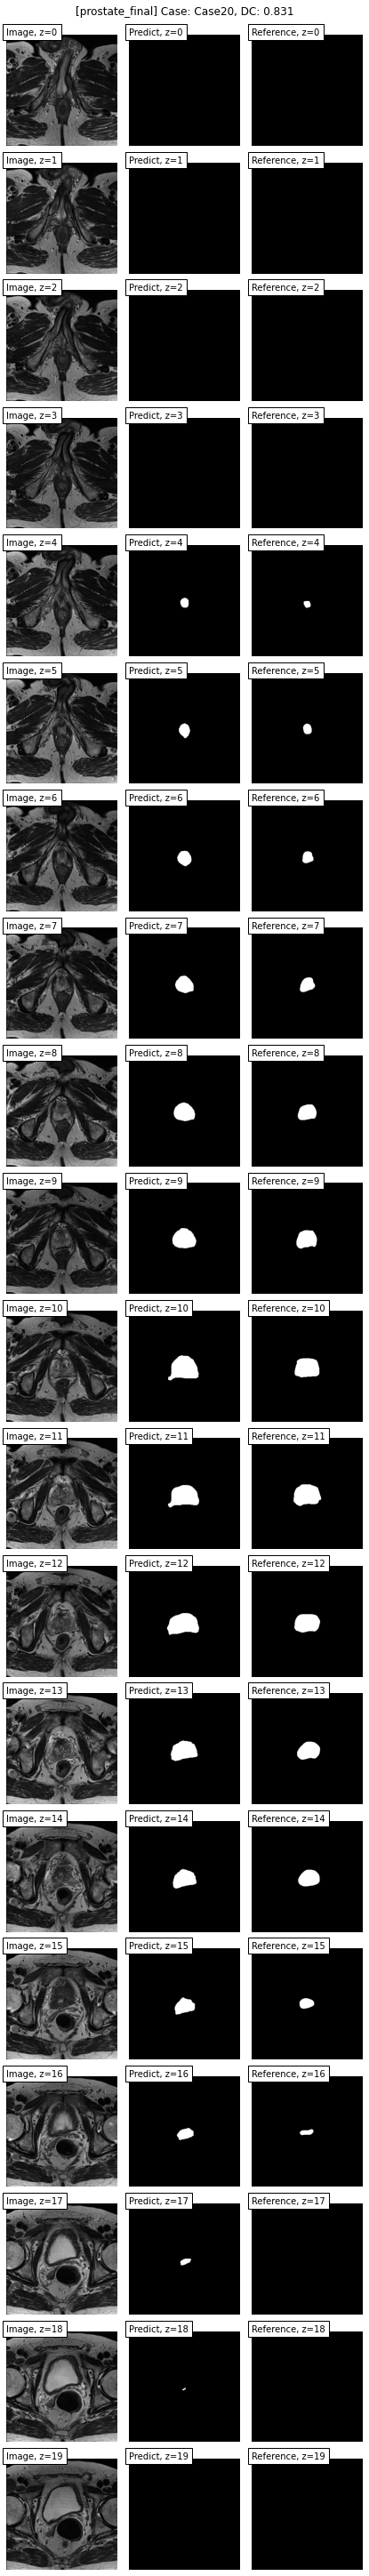

In [9]:
nodes = sm_model.get_list_nodes()
# for node in nodes[1:-1]:
for node in nodes[-2:-1]:
    pred_path = f'{output_dir}/{node}.roi'
    if np.all([os.path.exists(image_path), os.path.exists(roi_path), os.path.exists(pred_path)]):
        image = qimage.read(image_path)
        img = image.get_array()
        
        pred = qimage.cast(image)
        pred.fill_with_roi(pred_path)
        pred_roi = pred.get_array()

        roi = qimage.read(roi_path)
        ref_roi = roi.get_array()
        
        print(f'{node}|image:{img.shape}|pred:{pred_roi.shape}|ref:{ref_roi.shape}')

        c = 2
        fig, axes = plt.subplots(nrows=pred_roi.shape[0], ncols=3, figsize=(c*3,c*pred_roi.shape[0]))
        if pred_roi.shape[0] > 1:
            for z in range(pred_roi.shape[0]):
                axes[z][0].imshow(img[z], cmap='gray')
                axes[z][0].set_axis_off()
                axes[z][0].text(0, 0, f'Image, z={z}', color='black', bbox=dict(facecolor='white', alpha=1))
                axes[z][1].imshow(pred_roi[z], cmap='gray')
                axes[z][1].set_axis_off()
                axes[z][1].text(0, 0, f'Predict, z={z}', color='black', bbox=dict(facecolor='white', alpha=1))
                axes[z][2].imshow(ref_roi[z], cmap='gray')
                axes[z][2].set_axis_off()
                axes[z][2].text(0, 0, f'Reference, z={z}', color='black', bbox=dict(facecolor='white', alpha=1))
        else:
            axes[0].imshow(img[0], cmap='gray')
            axes[0].set_axis_off()
            axes[0].text(0, 0, f'Image', color='black', bbox=dict(facecolor='white', alpha=1))
            axes[1].imshow(pred_roi[0], cmap='gray')
            axes[1].set_axis_off()
            axes[1].text(0, 0, f'Predict', color='black', bbox=dict(facecolor='white', alpha=1))
            axes[2].imshow(ref_roi[0], cmap='gray')
            axes[2].set_axis_off()
            axes[2].text(0, 0, f'Reference', color='black', bbox=dict(facecolor='white', alpha=1))

        dc = medmetric.dc(pred_roi, ref_roi)
        casename = output_dir.split('_')[-1]
        plt.suptitle(f'[{node}] Case: {casename}, DC: {np.round(dc, 3)}', y=1.005)
        plt.tight_layout()
        plt.show()
    else:
        print(f'{node}|image:{os.path.exists(image_path)}|roi:{os.path.exists(roi_path)}|pred:{os.path.exists(pred_path)}')